<a href="https://colab.research.google.com/github/MamatkulovBunyodbek1999/Machine_Learning-a-quick-overview/blob/main/Machine_Learning_Learning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science and artificial intelligent  Practikum

## 5-MODUL. Machine Learning

### 5.1 - steps of ML project 

## Let's imagine that Our client is ""California Inc"" Building company.They want us to create some ML project, based on their data, In order to improve their work flow and to make better profit. They want to know in which areas they should build houses to make better profit. 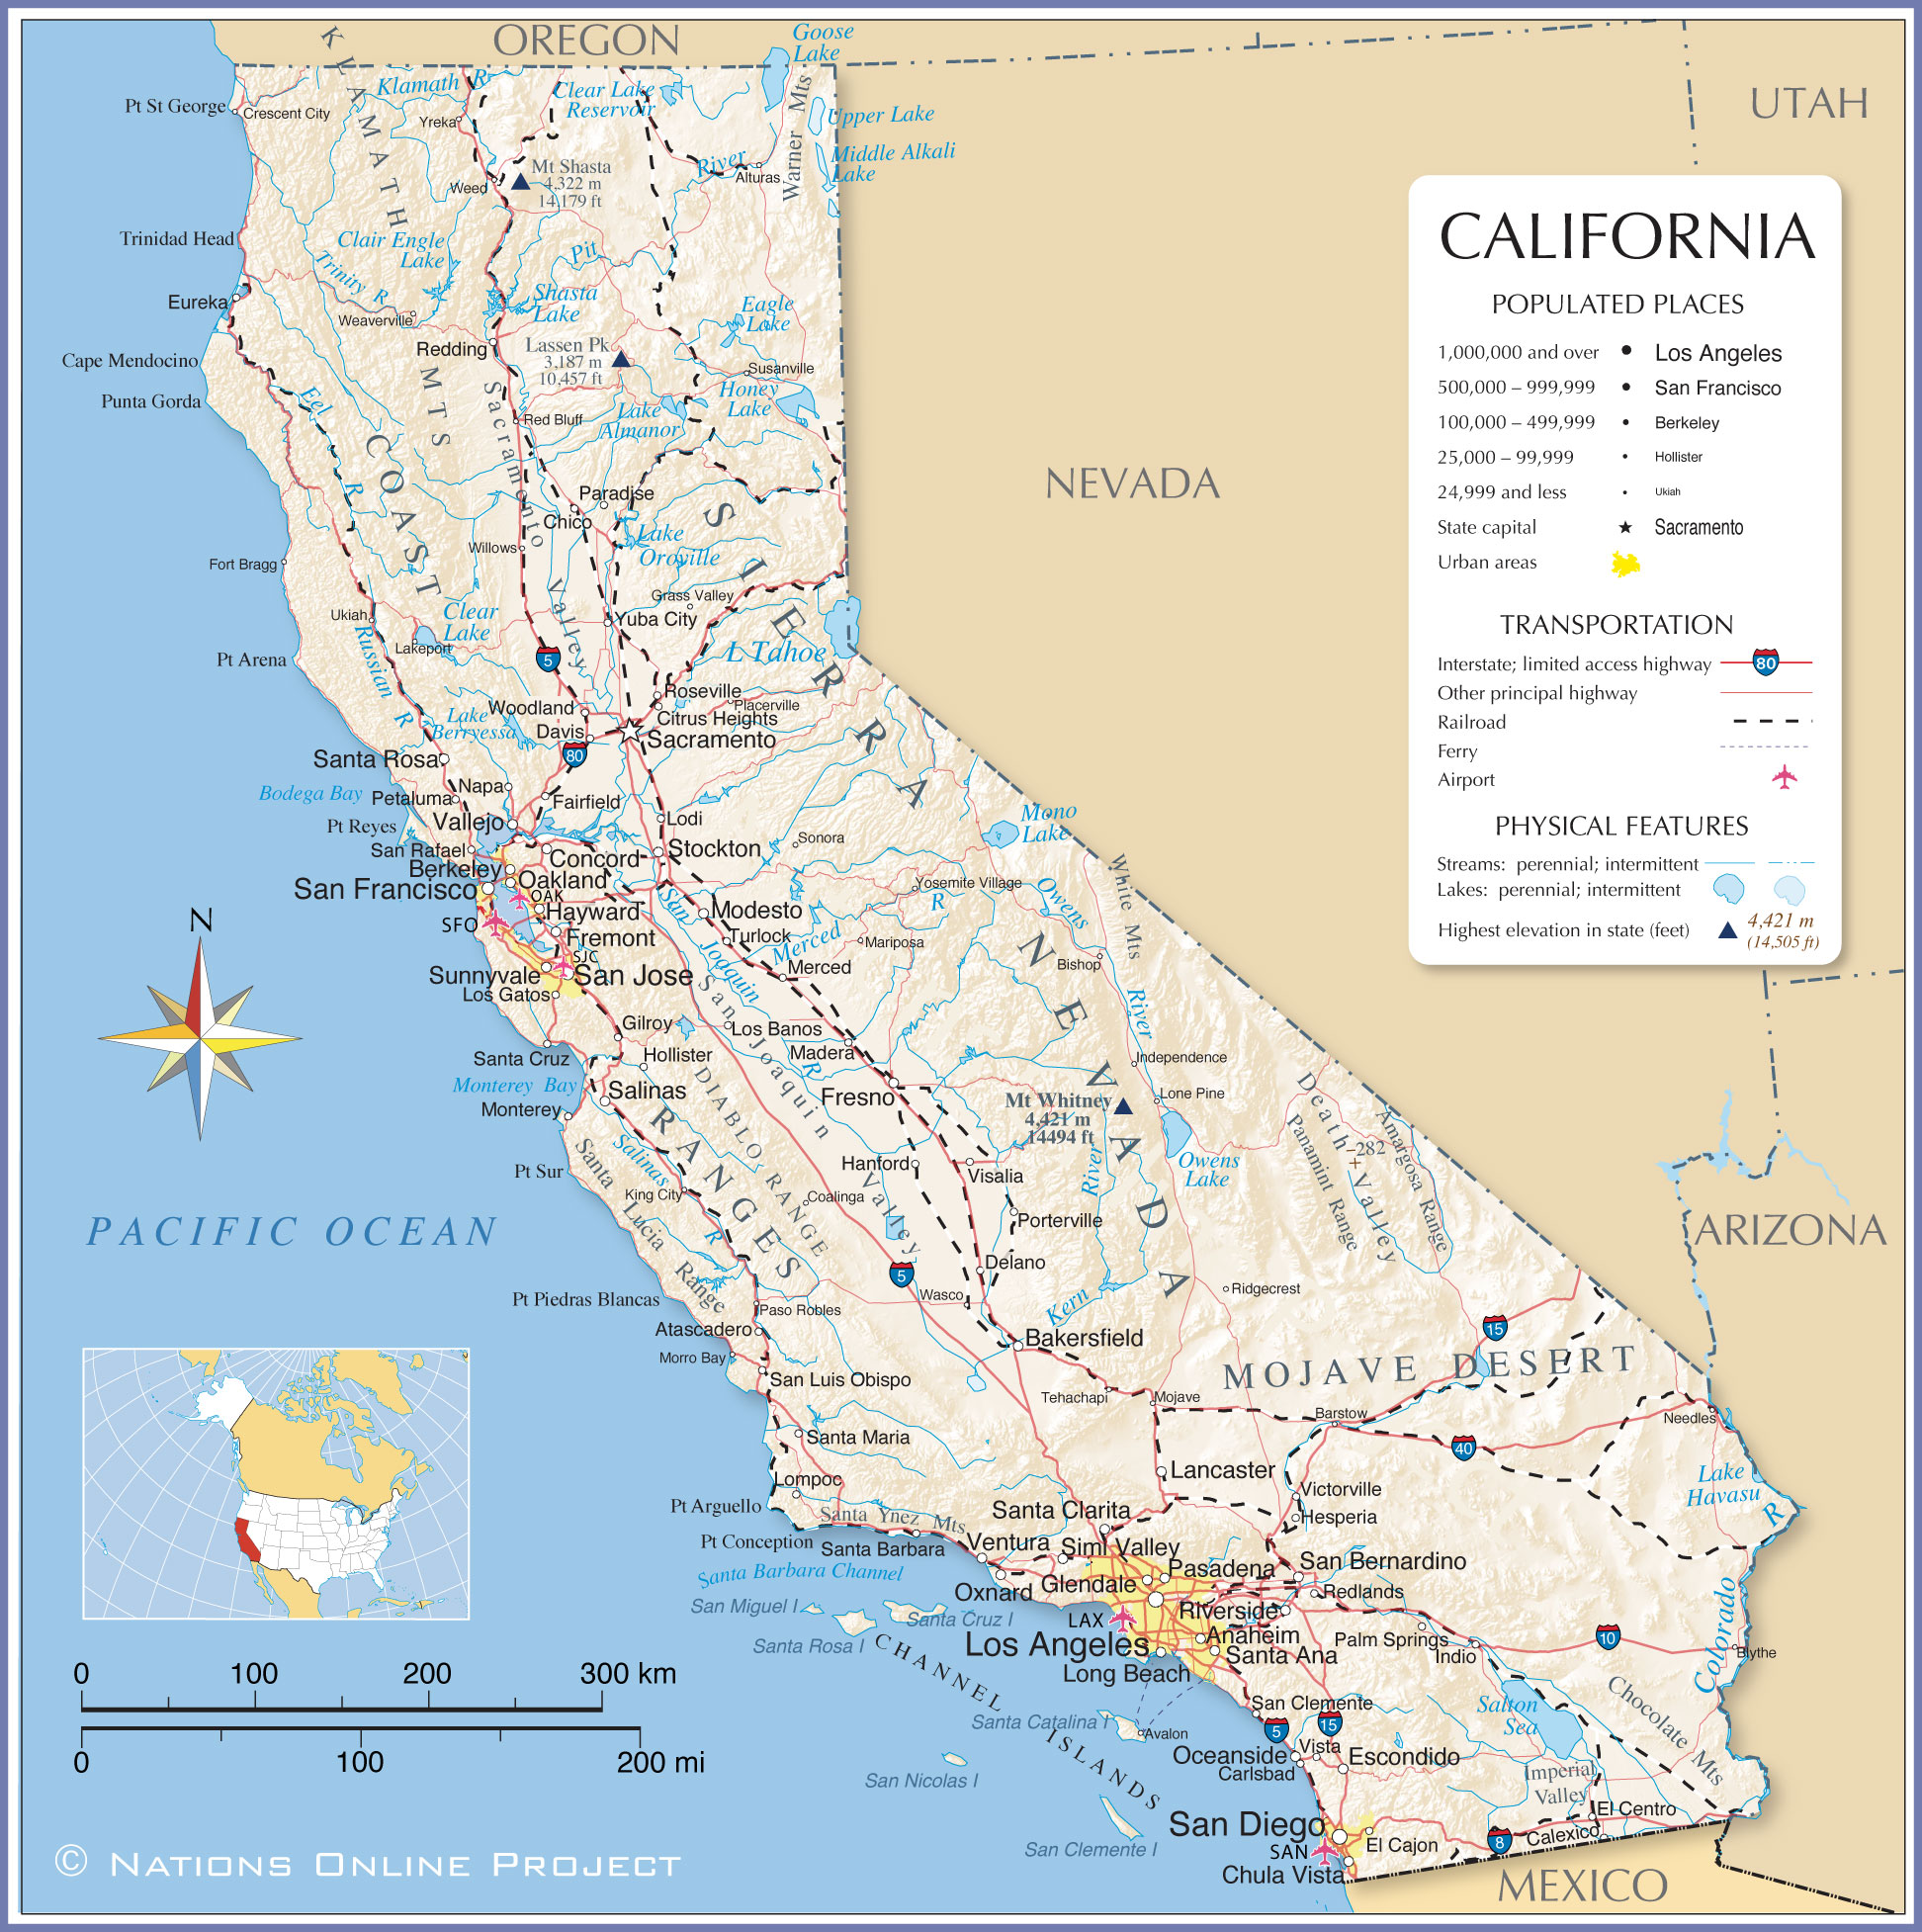 

## Predictions error by their analytics is about 20%. Our goal is to make ML project, which can predict better than their analytics.

# Let's import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn # scikit-learn library

# Now we will import  our data

In [29]:
# Onlayn dataset joylashgan manzilini ko'rsatamiaz
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### As we can see that our df has 20640 raws, but only TOTAL BEDROOMS column has 20433 raws. it means that the column does not have more than 200 values.

### All our datas are float64, which is great, sometimes datas will be object even though  df shows numbers. 

### Houses have been separated into 5 groups according to their distance from ocean 

In [6]:
df['ocean_proximity'].value_counts() # Houses have been separated into 5 groups according to their distance from ocean 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Machine Learning Algorythim does not support objects, that's why we will need to convert it into float64.

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Let's see the data in histogramm plots

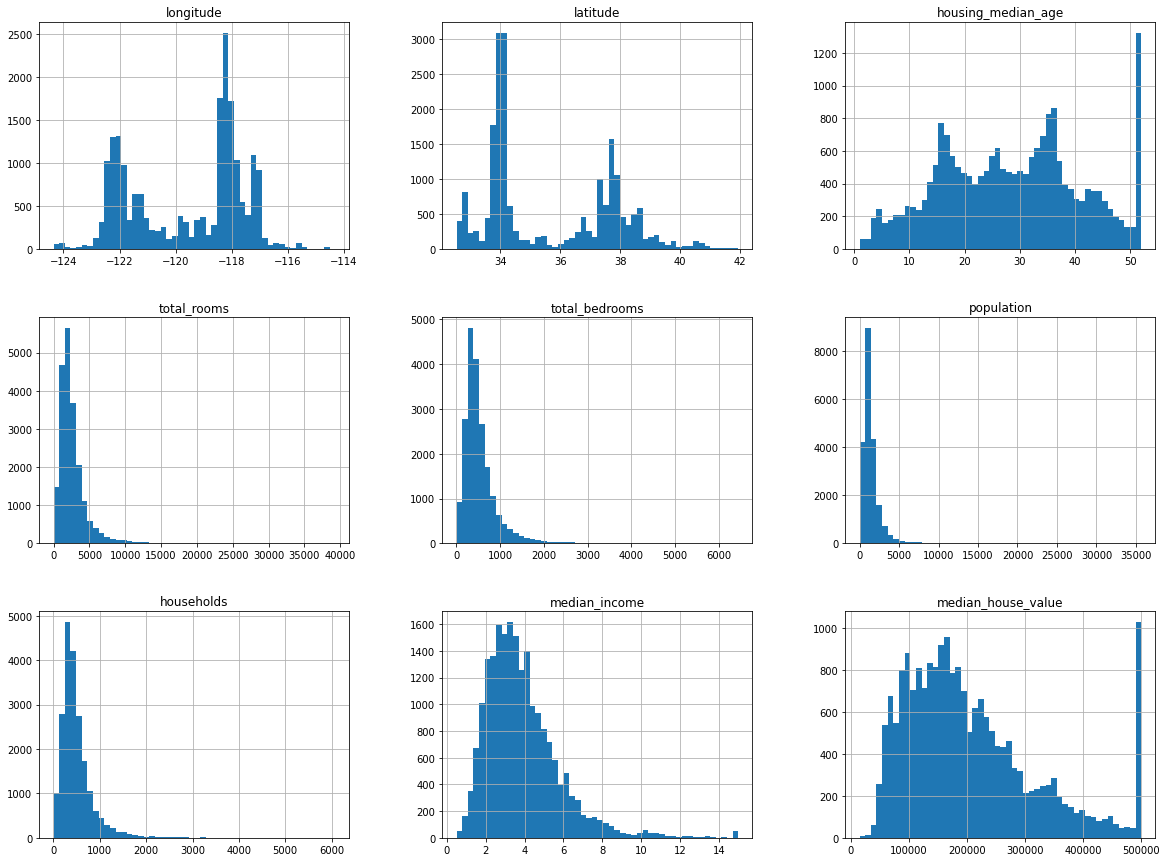

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Our graphs do not support normal distibution. for ex: median_house_value plot shows us that df has wrong collected data , houses with 500000usd value suddenly sky-rocketed. Median house age also has the same issue. 
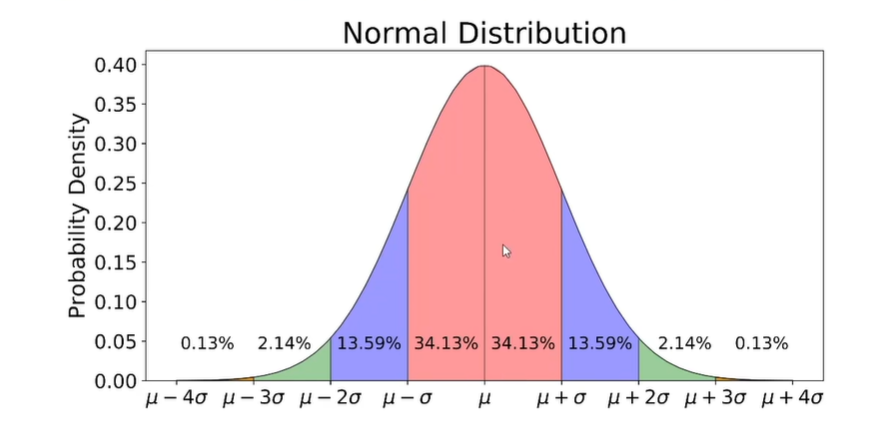

### Our data has wrong values, this will affect our ML prediction accuracy.
### In this case we have 2 ways. 1st way is to go back and re-collect datas. 2nd way is just to drop those values, that's it.

# Now we will start to work with Scikit-Learn library.

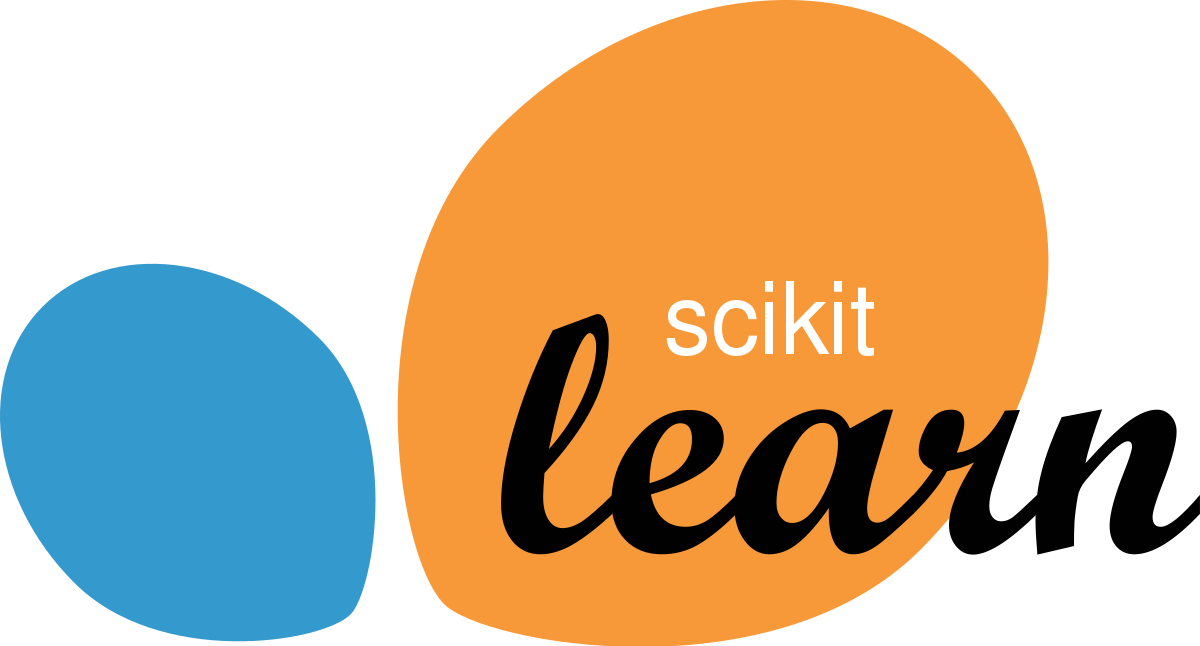

### Depending on our data set size, we can separate our data into 2 sets( Train set 80%, 20% Test set), 

# scikit-Learn, 
```
 train_test_split
```
 ```
 train_set, test_set = train_test_split(df, test_size=0.2, random_state=35) 
 ```
### This method randomly splits  the data into 2 sets 

In [9]:
from sklearn.model_selection import train_test_split # It will devide our data into 2 sets.
# now we will give titles to out sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=35) 
# in order not to show the test_set to our computer, we have to fix the separated data with random_state !!

In [10]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,204200.0,NEAR BAY
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,95600.0,INLAND
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,112000.0,<1H OCEAN
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,410000.0,NEAR OCEAN
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,51600.0,INLAND


In [11]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9288,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,435900.0,NEAR BAY
1878,-119.96,38.93,22.0,2731.0,632.0,1215.0,483.0,2.8300,110500.0,INLAND
20439,-118.80,34.27,12.0,3330.0,600.0,1577.0,584.0,4.6985,264100.0,<1H OCEAN
10957,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,187200.0,<1H OCEAN
10316,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,304900.0,<1H OCEAN


# Train_test_split Method :
*[ from sklearn.model_selection import train_test_split ] # It will devide our data  into 2 sets.
######now we will give titles to our sets
* [  train_set, test_set = train_test_split(df, test_size=0.2, random_state=35)  ]
# in order not to show the test_set to our computer, we have to fix the separated data with random_state !!
#### This method randomly splits the data into 2 sets. weak point of this method is we cannot keep a certain balance amongst data values while spliting. Let's say we have df which contains 60% data about men and 40% data about women. If we want to keep this proportion while splitting data, "train_test_split " method is going to be  useless. In this case "StratifiedShuffleSplit" is going to help  us. 


# Scikit-learn >>> StratifiedShuffleSplit

## In order to use StratifiedShuffleSplit, we need to separate column into defferen categories

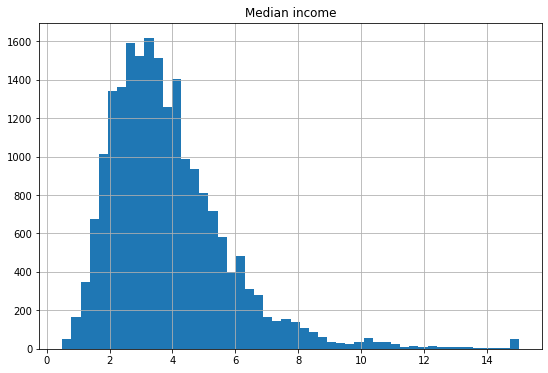

In [12]:
df['median_income'].hist(bins=50, figsize=(9,6))
plt.title("Median income")
plt.show()

#Separating df['median_income'] into different catigories by "pd.cut()"

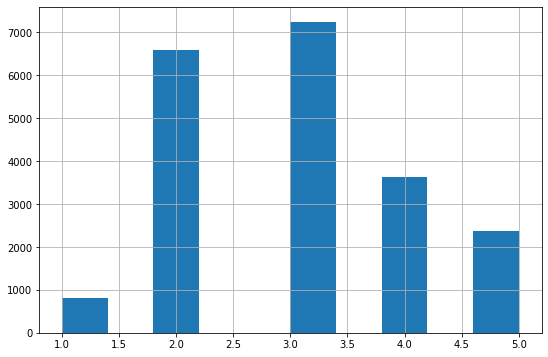

In [13]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

# StratifiedShuffleSplit function gives only indexes. 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# stratified_split.split  function gives only indexes.  To read them we will write additional codes
for train_index, test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
strat_train_set.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
1060,-121.88,39.74,12.0,14631.0,3298.0,7517.0,3262.0,1.6785,153100.0,INLAND,2
6091,-117.84,34.10,17.0,7836.0,1624.0,4419.0,1526.0,3.8465,180700.0,<1H OCEAN,3
17528,-121.89,37.33,6.0,1495.0,552.0,1087.0,557.0,2.8798,225000.0,<1H OCEAN,2
1374,-122.12,38.01,50.0,1300.0,263.0,691.0,239.0,3.9519,126500.0,NEAR BAY,3
6651,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0,<1H OCEAN,2


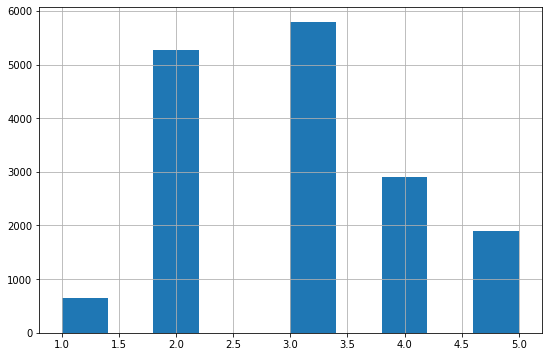

In [16]:
strat_train_set['income_cat'].hist(figsize=(9,6))
plt.show()

### As we can see from the graph above, we kept  balance while splitting.

In [17]:
# Now we have to drop income_cat column from train and test sets, because we will not need them in the future.
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

# Correlation 

In [18]:
# I"m going to get a  copy from  strat_train_set, I'm just trying not to touch the main train set while doing some practice on it. 
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


# Let's see CA's map
<img src="https://www.nationsonline.org/maps/USA/California_map-L.jpg"
alt="California" width="600"/>

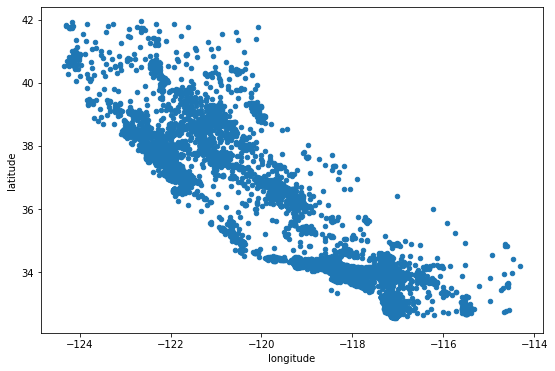

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9,6))
plt.show()

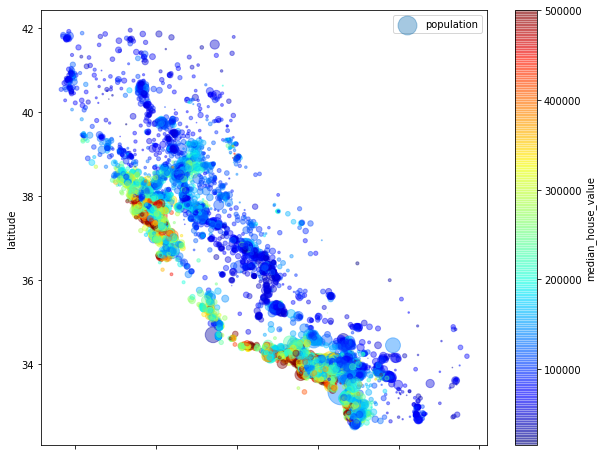

In [20]:
housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.4,
    s=housing['population']/50, #spots radius is going to change according to population's amount.
    label="population",
    c="median_house_value", # spot's color is going to chnge according to prices.
    cmap="jet", # Colors. Blue - less income, red - high income
    colorbar=True,
    figsize=(10,8)
)
plt.show()

In [21]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
dtype: float64

### From the code above it is clear that the median_income has the most correlation with median_house_value.

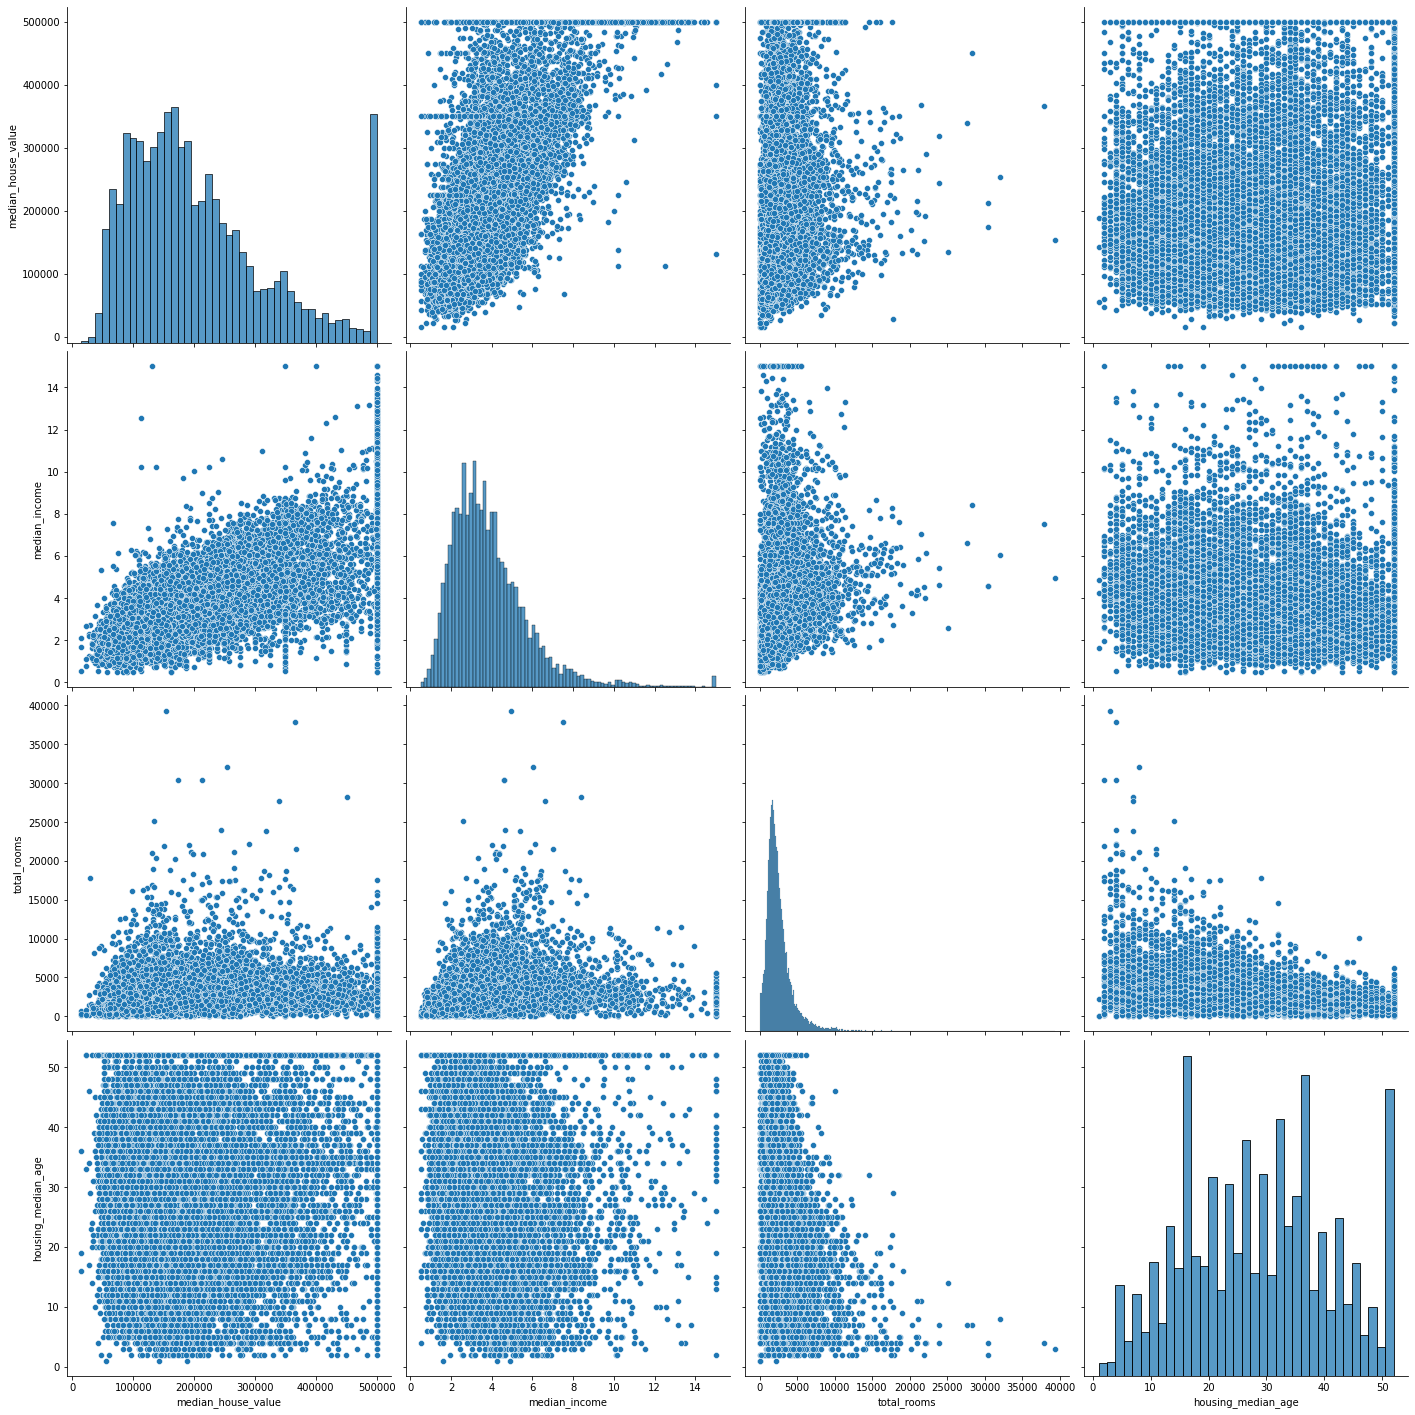

In [22]:
cols = ['median_house_value','median_income','total_rooms','housing_median_age']
sns.pairplot(housing[cols], height=5)
plt.show()

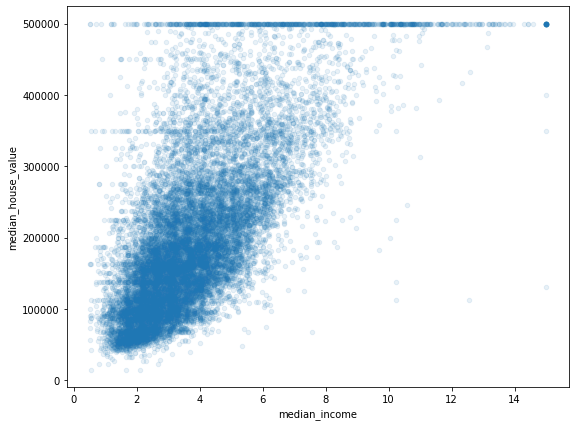

In [23]:
housing.plot(kind='scatter', x="median_income", y="median_house_value", alpha=0.1, figsize=(9,7))
plt.show()

# Creating new columns from existing ones !
### If our data is not enough, we can create new columns from existing columns. How to create them depends on our creativity. 

In [24]:
# We have "total_rooms" and "households" columns, from which we can know the density of the family/households.

In [25]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [27]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
dtype: float64

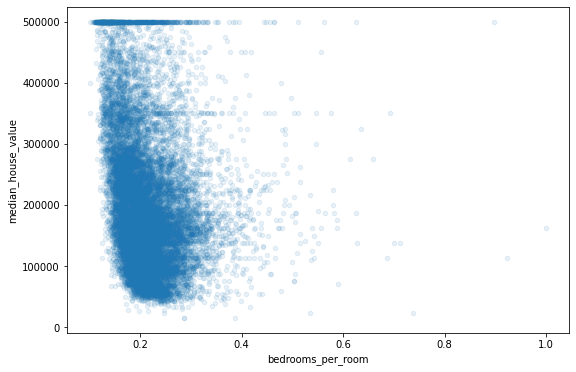

In [30]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value" , alpha=0.1, figsize=(9,6) )
plt.show()

# Preparation for Machine Learning >>> NaN values.

